In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [9]:
titanic= pd.read_csv('titanic.csv')
print(titanic)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.shape


(891, 12)

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
def bar_chart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 Sex
female    233
male      109
Name: count, dtype: int64
Dead:
 Sex
male      468
female     81
Name: count, dtype: int64


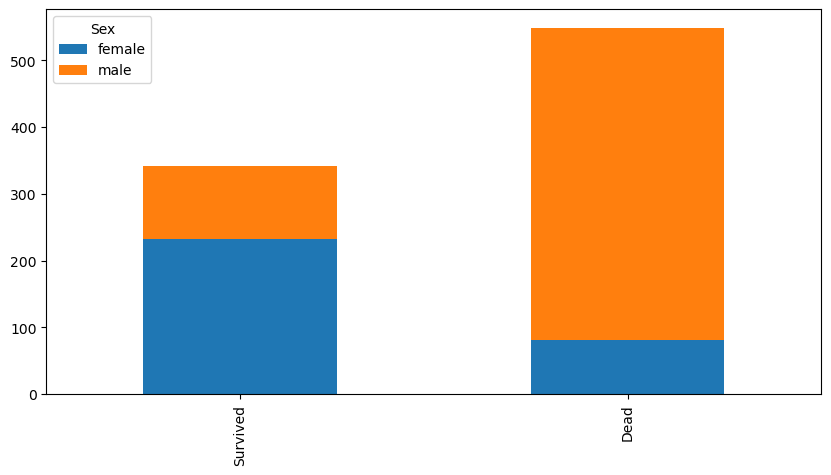

In [20]:
bar_chart('Sex')
print("Survived :\n",titanic[titanic['Survived']==1]['Sex'].value_counts())
print("Dead:\n",titanic[titanic['Survived']==0]['Sex'].value_counts())

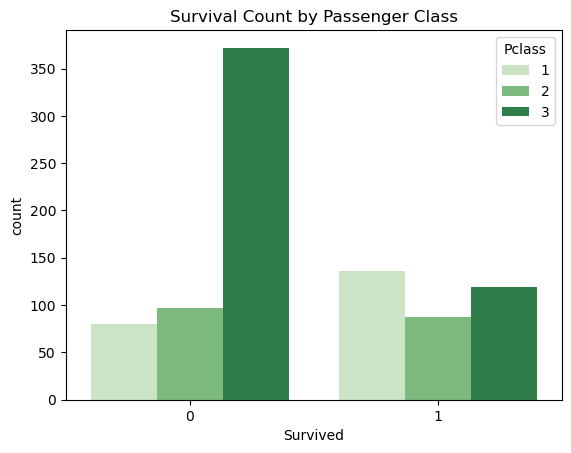

In [23]:
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='Greens')  # Using a green palette
plt.title('Survival Count by Passenger Class')
plt.show()

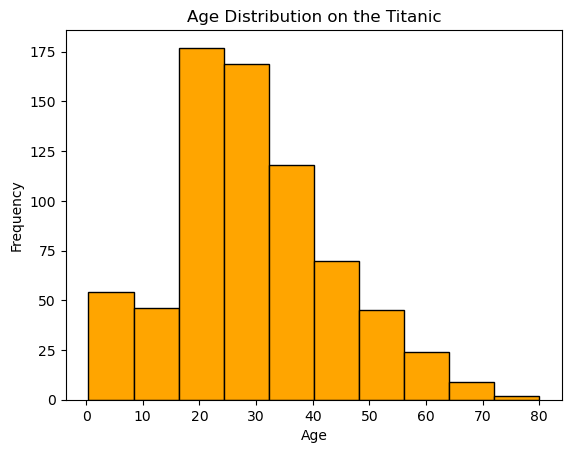

In [35]:
titanic['Age'].plot.hist(color='orange', edgecolor='black')
plt.title('Age Distribution on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Frequency'>

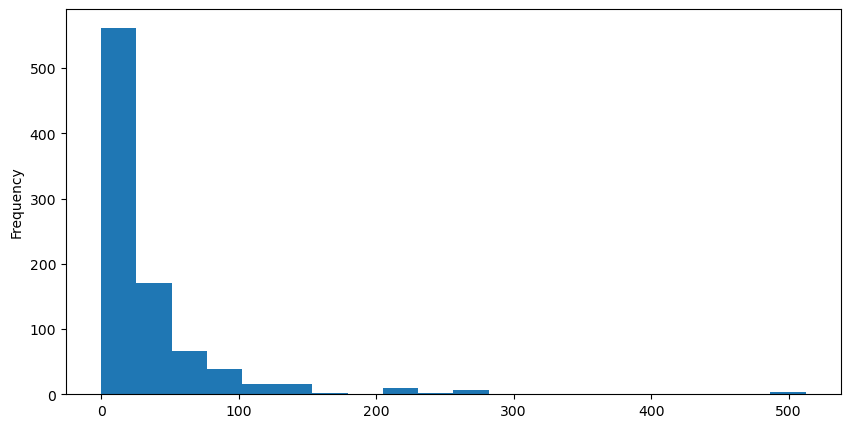

In [36]:
titanic['Fare'].plot.hist(bins=20, figsize=(10,5))

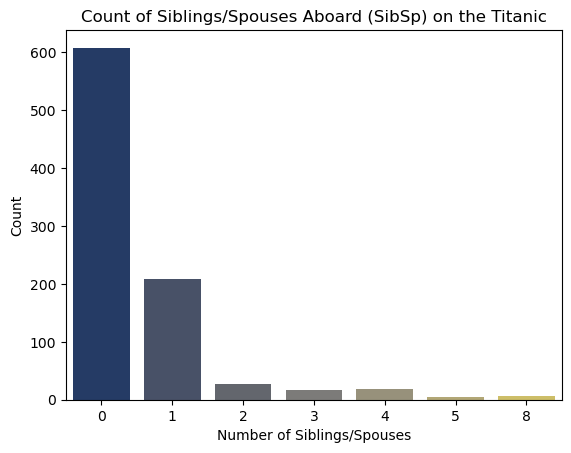

In [38]:
sns.countplot(x='SibSp', data=titanic, palette='cividis')
plt.title('Count of Siblings/Spouses Aboard (SibSp) on the Titanic')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

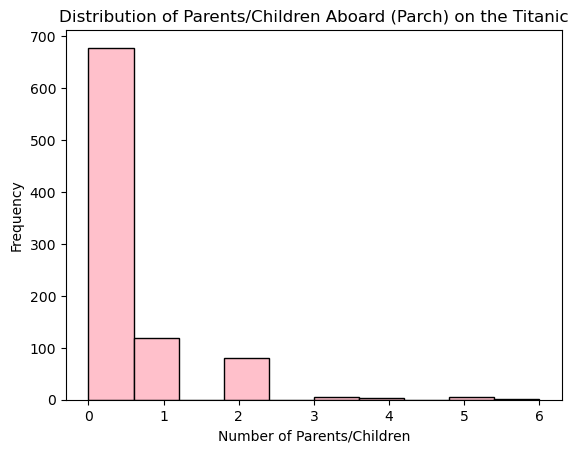

In [39]:
titanic['Parch'].plot.hist(color='pink', edgecolor='black')
plt.title('Distribution of Parents/Children Aboard (Parch) on the Titanic')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Frequency')
plt.show()

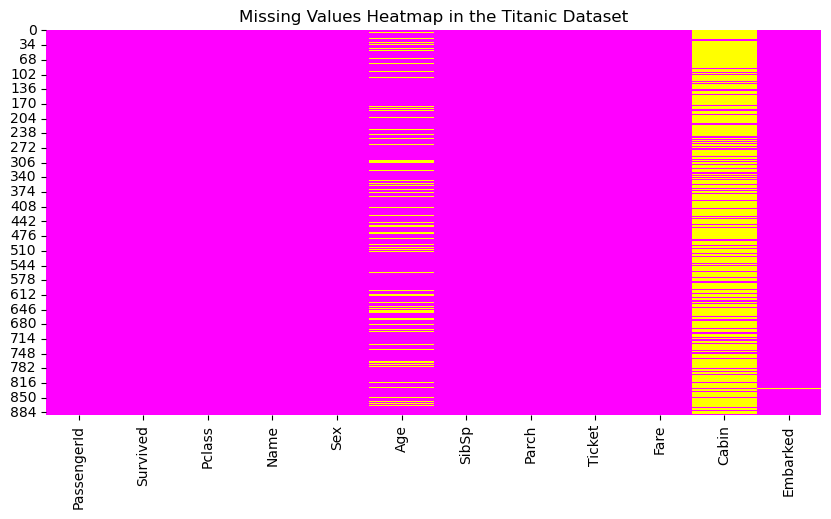

In [41]:
plt.figure(figsize=(10, 5))
sns.heatmap(titanic.isnull(), cmap='spring', cbar=False)
plt.title('Missing Values Heatmap in the Titanic Dataset')
plt.show()

In [55]:
titanic= pd.read_csv('titanic.csv') 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# Check the current columns in the DataFrame
print("Current columns:", titanic.columns)

# Drop the 'Cabin' column if it exists
if 'Cabin' in titanic.columns:
    titanic.drop('Cabin', axis=1, inplace=True)
    print("Column 'Cabin' dropped.")
else:
    print("Column 'Cabin' not found in the DataFrame.")

# Display the first 3 rows of the modified DataFrame
print(titanic.head(3))


Current columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Column 'Cabin' not found in the DataFrame.
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  


In [63]:
titanic.dropna(inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [64]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [67]:
sex=pd.get_dummies(titanic['Sex'], drop_first=True) 
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [68]:
embark=pd.get_dummies(titanic['Embarked'])
embark.head(3)

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True


In [69]:
embark=pd.get_dummies(titanic['Embarked'], drop_first=True)
embark.head(3)

,Q,S
0,False,True
1,False,False
2,False,True


In [70]:
Pcl=pd.get_dummies(titanic['Pclass'], drop_first=True) 
Pcl.head(3)

,2,3
0,False,True
1,False,False
2,False,True


In [71]:
titanic=pd.concat([titanic, sex, embark, Pcl], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


In [76]:
titanic.drop(['Name','PassengerId', 'Pclass',"Ticket",'Sex','Embarked'], axis=1, inplace=True)
titanic.head(3)


,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True


In [78]:
x=titanic.drop('Survived', axis=1) 
y=titanic['Survived']

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=40)

In [82]:
x_train = x_train.apply(lambda col: col.astype(str))


In [85]:
missing_values_x = pd.DataFrame(x).isnull().sum().sum()
missing_values_y = pd.Series(y).isnull().sum()

print(f"Number of missing values in x: {missing_values_x}")
print(f"Number of missing values in y: {missing_values_y}")

Number of missing values in x: 0
Number of missing values in y: 0


In [86]:
x_df = pd.DataFrame(globals()['x'])
y_df = pd.DataFrame(globals()['y'])

In [87]:
x_df.dropna(inplace=True)
y_df.dropna(inplace=True)

x = x_df.values
y = y_df.values

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


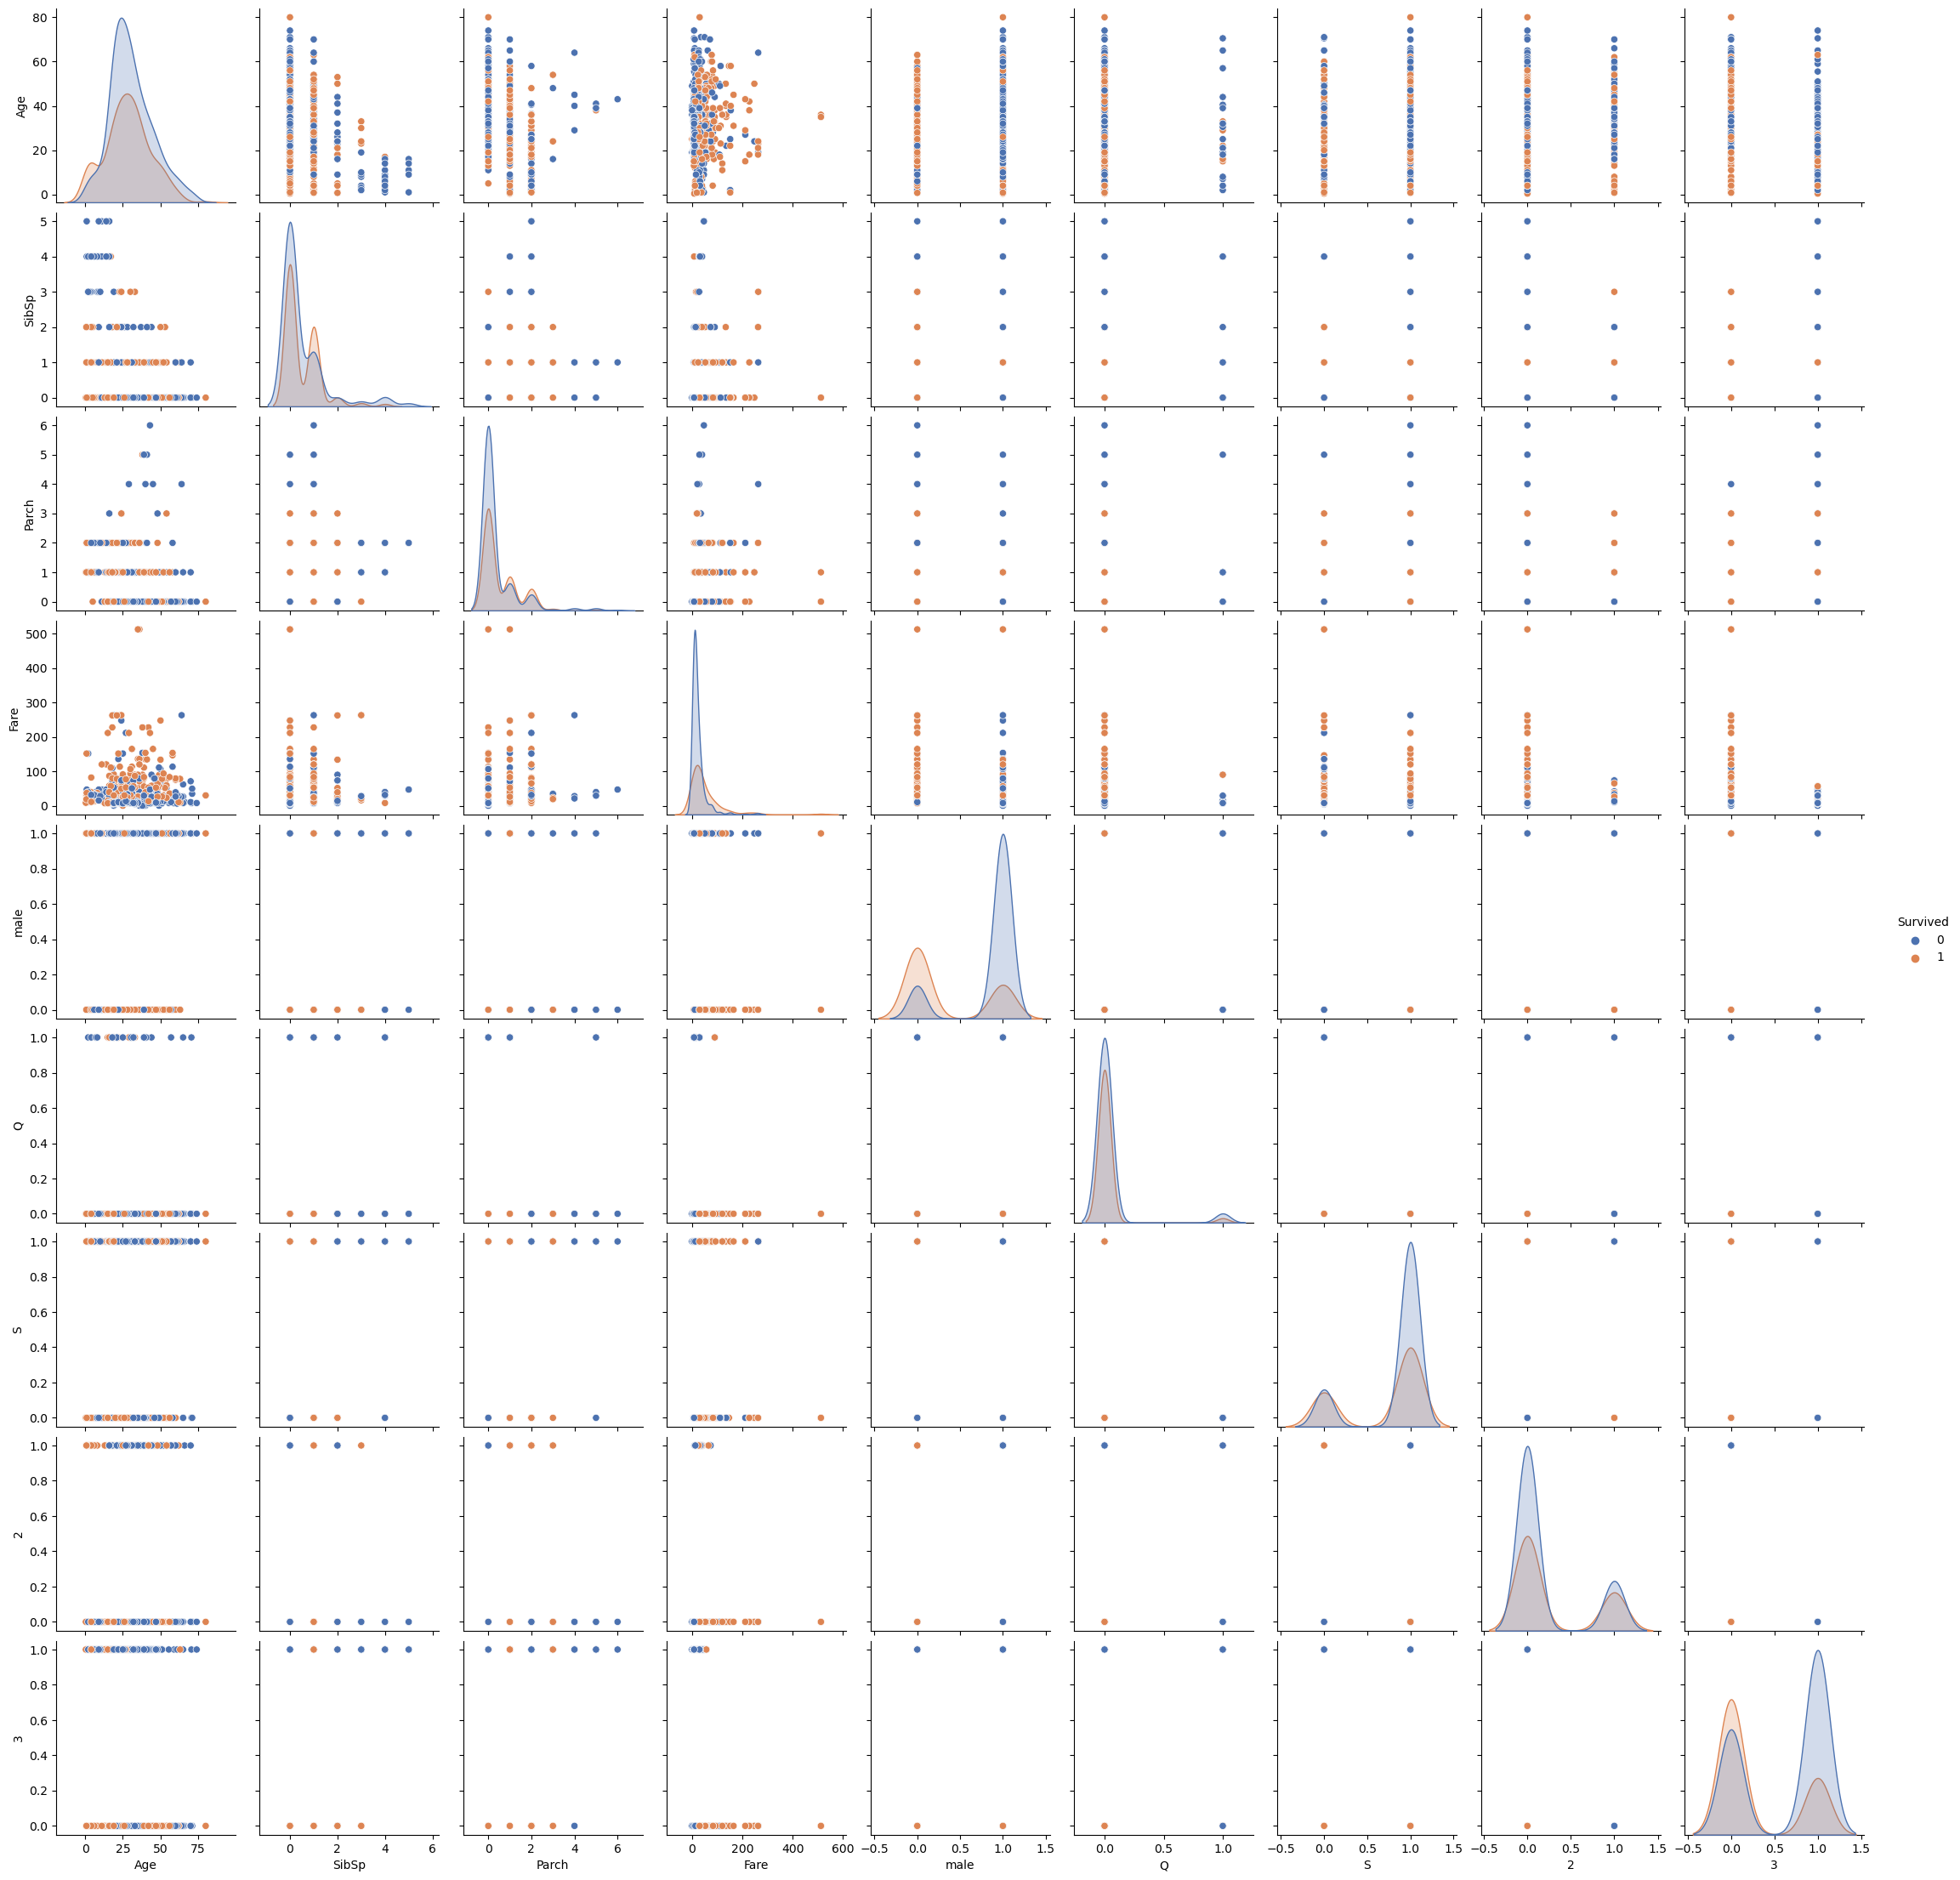

In [118]:
sns.set_palette(sns.color_palette('deep'))
sns.pairplot(titanic, hue='Survived')

In [ ]:
Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=2)

In [102]:
print (x_train.shape)
print(y_train.shape)
print(x_test.shape)
print (y_test.shape)

(569, 9)
(569, 1)
(143, 9)
(143, 1)


In [103]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [105]:
lr=LogisticRegression()


In [107]:
lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [108]:
# accuracy on training data
x_train_prediction=lr.predict(x_train)
print(x_train_prediction)

[0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0
 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 1 1 1 0 0 0 1 1 0 0 

In [ ]:
# we are compring predicted values (x_train) with original values (y_train
training_data_accuracy=accuracy_score(y_train, x_train_prediction)
print ("Accuracy score of training data: ",training_data_accuracy*100)
Accuracy score of training data: 88.89887640449437
# accuracy an test dara
*_test_pcediction=lr.predict(x_test)
print(x_fest_prediction)
[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0
0010010011001000000001010001010
1 0 0 0 1 3 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 11000
0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 11110100
0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 à a]
test_data_accuracy-accuracy_score(y_test, x_test_prediction)
print("Accucecy score of test data: "test_nata_accuracy")

In [110]:
# we are compring predicted values (x_train) with original values (y_train)
training_data_accuracy=accuracy_score(y_train, x_train_prediction)
print ("Accuracy score of training data: ",training_data_accuracy*100)

Accuracy score of training data:  81.195079086116


In [114]:
# accuracy an test data
x_test_prediction=lr.predict(x_test)
print(x_test_prediction)

[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1]


In [116]:
test_data_accuracy=accuracy_score(y_test, x_test_prediction)
print("Accuracy score of test data: ",test_data_accuracy*100)

Accuracy score of test data:  75.52447552447552


Random Forest classifier

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [121]:
data = pd.read_csv('Titanic.csv', index_col='PassengerId')

In [122]:
# Data cleaning
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)


In [123]:
# Data preprocessing
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [124]:
# Data splitting
x_cols = ['Pclass', 'Sex', 'Fare', 'Embarked']
y_col = 'Survived'

x = data[x_cols]
y = data[y_col]

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [126]:
# Standardization
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)


In [127]:
# Model Building and Testing (Random Forest)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
clf_rf.fit(x_train_std, y_train)
y_pred_rf = clf_rf.predict(x_test_std)


              precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       0.80      0.69      0.74        58

    accuracy                           0.79       135
   macro avg       0.79      0.78      0.78       135
weighted avg       0.79      0.79      0.79       135



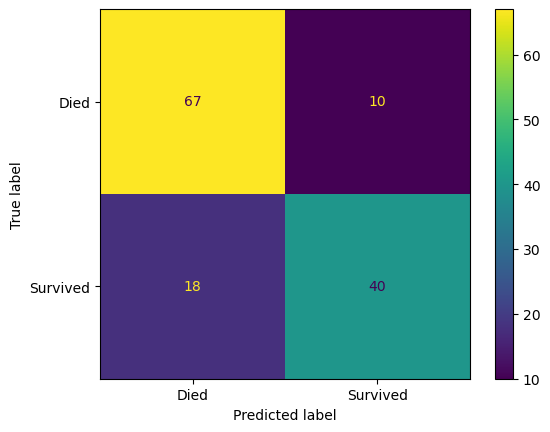

In [128]:
# Model evaluation
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Died', 'Survived']).plot()


In [129]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': x_cols, 'Importance': clf_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

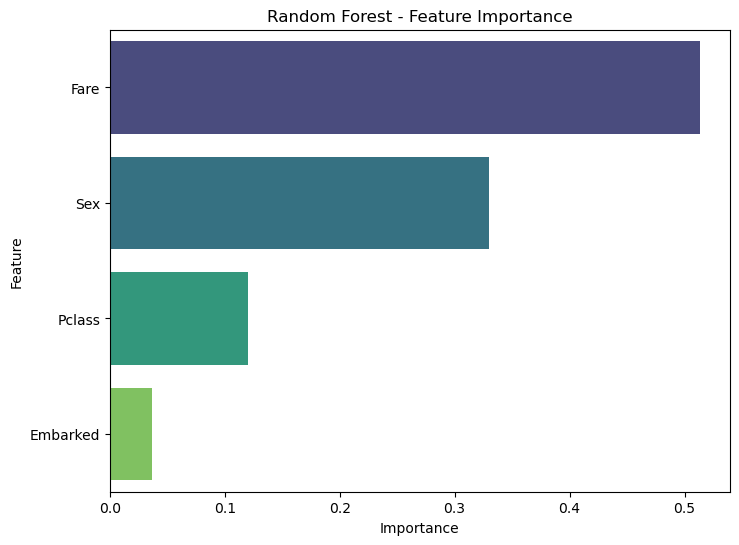

In [130]:
# Visualizing Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.show()